<a href="https://colab.research.google.com/github/SUYAMBULAKSHMI-VENKATESAN/DAMAKA/blob/main/Segmentation_graph_based.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

+---------------+-----------------------------------+----------+------------+-----------+
| Stage         | Parameters                        | Method   | Mean       | Std Dev   |
+===============+===================================+==========+============+===========+
| Blurred Image | (5, 5)                            | -        | Mean=98.18 | Std=29.16 |
+---------------+-----------------------------------+----------+------------+-----------+
| Felzenszwalb  | scale=100, sigma=0.5, min_size=50 | skimage  | Mean=85.83 | Std=59.81 |
+---------------+-----------------------------------+----------+------------+-----------+


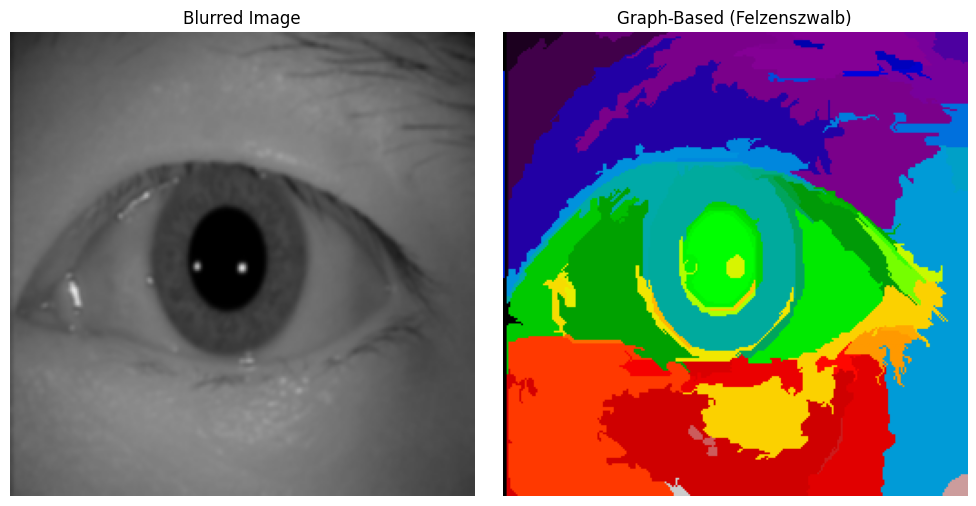

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate
from skimage.segmentation import felzenszwalb


def apply_graph_based_segmentation(image_path):
    # Load and resize image (required for graph-based segmentation)
    image = cv2.imread(image_path)
    if image is None:
        raise FileNotFoundError(f"Image not found at {image_path}")

    resized_image = cv2.resize(image, (256, 256))

    # Preprocessing: Gaussian Blur
    blur_kernel_size = (5, 5)
    blurred = cv2.GaussianBlur(resized_image, blur_kernel_size, 0)

    # Convert to float and apply felzenszwalb segmentation
    float_img = cv2.cvtColor(blurred, cv2.COLOR_BGR2RGB) / 255.0

    # Parameters for felzenszwalb
    scale = 100
    sigma = 0.5
    min_size = 50

    segments = felzenszwalb(float_img, scale=scale, sigma=sigma, min_size=min_size)
    segmented_img = (segments * (255 // (np.max(segments) + 1))).astype(np.uint8)

    # Metrics
    table_data = [
        ["Blurred Image", str(blur_kernel_size), "-", f"Mean={np.mean(blurred):.2f}", f"Std={np.std(blurred):.2f}"],
        ["Felzenszwalb", f"scale={scale}, sigma={sigma}, min_size={min_size}", "skimage", f"Mean={np.mean(segmented_img):.2f}", f"Std={np.std(segmented_img):.2f}"],
    ]

    headers = ["Stage", "Parameters", "Method", "Mean", "Std Dev"]
    print(tabulate(table_data, headers=headers, tablefmt="grid"))

    # Display results
    titles = ["Blurred Image", "Graph-Based (Felzenszwalb)"]
    images = [cv2.cvtColor(blurred, cv2.COLOR_BGR2RGB), segmented_img]

    plt.figure(figsize=(10, 5))
    for i in range(2):
        plt.subplot(1, 2, i + 1)
        plt.imshow(images[i], cmap='nipy_spectral')
        plt.title(titles[i])
        plt.axis('off')
    plt.tight_layout()
    plt.show()

    return table_data

# Example usage:
result = apply_graph_based_segmentation("/content/S6000S00.jpg")
